In [1]:
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
import imageio

In [2]:
col_names = ['Step number',
'Age (years)',
'Mass (M0)',
'Log10 Luminosity (L0)',
'Log10 Radius (R0)',
'Log10 Surface temperature (K)',
'Log10 Central temperature (K)',
'Log10 Central density (kg m-3)',
'Log10 Central pressure (N m-2)',
'Central electron degeneracy parameter',
'Central hydrogen mass fraction',
'Central helium mass fraction',
'Central carbon mass fraction',
'Central nitrogen mass fraction',
'Central oxygen mass fraction',
'Dynamical timescale (seconds)',
'Kelvin-Helmholtz timescale (years)',
'Nuclear timescale (years)',
'Luminosity from PP chain (L0)',
'Luminosity from CNO cycle (L0)',
'Luminosity from triple-alpha reactions (L0)',
'Luminosity from metal burning (L0)',
'Luminosity of neutrino losses (L0)',
'Mass of helium core (M0)',
'Mass of carbon core (M0)',
'Mass of oxygen core (M0)',
'Radius of helium core (R0)',
'Radius of carbon core (R0)',
'Radius of oxygen core (R0)']

col_names_extended = ['Lagrangian mass coordinate (M0)',
             'Radius coordinate (R0)',
             'Luminosity (L0)',
             'Total pressure (N m-2)',
             'Density (kg m-3)',
             'Temperature (K)',
             'Specific internal energy (J kg-1)',
             'Specific entropy (J K-1 kg-1)',
             'Specific heat at constant pressure (J K-1 kg-1)',
             'First adiabatic exponent',
             'Adiabatic temperature gradient',
             'Mean molecular weight',
             'Electron number density (m-3)',
             'Electron pressure (N m-2)',
             'Radiation pressure (N m-2)',
             'Radiative temperature gradient',
             'Material temperature gradient',
             'Convective velocity (m s-1)',
             'Rosseland mean opacity (m2 kg-1)',
             'Power per unit mass from all nuclear reactions, excluding neutrino losses (W kg-1)',
             'Power per unit mass from PP chain (W kg-1)',
             'Power per unit mass from CNO cycle (W kg-1)',
             'Power per unit mass from triple-alpha reaction (W kg-1)',
             'Power loss per unit mass in nuclear neutrinos (W kg-1)',
             'Power loss per unit mass in non-nuclear neutrinos (W kg-1)',
             'Power per unit mass from gravitational contraction (W kg-1)',
             'Hydrogen mass fraction (all ionization stages)',
             'Molecular hydrogen mass fraction',
             'Singly-ionized hydrogen mass fraction',
             'Helium mass fraction (all ionization stages)',
             'Singly-ionized helium mass fraction',
             'Doubly-ionized helium mass fraction',
             'Carbon mass fraction',
             'Nitrogren mass fraction',
             'Oxygen mass fraction',
             'Electron degeneracy parameter']

In [3]:
data_1_5 = pd.read_fwf('Data1_5/Data0_01/summary_SI.txt', names=col_names, index_col=0)
# data_20 = pd.read_fwf('Data20/Data0_01/summary_SI.txt', names=col_names, index_col=0)

data_1_5_extended = pd.read_fwf('Data1_5/Data0_01/Detailed/structure_00374.txt', names=col_names_extended, index_col=0)
data_20_extended = pd.read_fwf('Data20/Data0_01/Detailed/structure_00374.txt', names=col_names_extended, index_col=0)

In [4]:
def plot_lumin(data, low_mass=True):
    fig, ax = plt.subplots(1, 3, figsize=(12, 5))
    
    ax[0].plot(data['Radius coordinate (R0)'], data['Power per unit mass from PP chain (W kg-1)'], linestyle='-', c='r', label='PP chain')
    ax[1].plot(data['Radius coordinate (R0)'], data['Power per unit mass from CNO cycle (W kg-1)'], linestyle='-', c='g', label='CNO cycle')
    ax[2].plot(data['Radius coordinate (R0)'], data['Power per unit mass from triple-alpha reaction (W kg-1)'], linestyle='-', c='b', label=r'3$\alpha$ Reaction')
    
    ax[0].legend()
    ax[1].legend()
    ax[2].legend()
    
    ax[0].set_yscale('log')
    ax[1].set_yscale('log')
    ax[2].set_yscale('log')
    
    ax[0].set_xscale('log')
    ax[1].set_xscale('log')
    ax[2].set_xscale('log')
    
    ax[0].grid(alpha=0.5)
    ax[1].grid(alpha=0.5)
    ax[2].grid(alpha=0.5)
    
    ax[0].set_xlabel('Log Radius (R☉)')
    ax[1].set_xlabel('Log Radius (R☉)')
    ax[2].set_xlabel('Log Radius (R☉)')
    ax[0].set_ylabel('Log Power per unit mass from PP chain (W kg-1)')
    
    #ax[0].set_title('Mass 1.5 M☉ Star')
    #ax[1].set_title('Mass 20 M☉ Star')
    if low_mass:
        fig.suptitle('Log Power per unit mass from PP Chain, CNO cycle, Triple-a vs. Radius for a Mass 1.5 M☉ Star', fontsize=15);
    else:
        fig.suptitle('Log Power per unit mass from PP Chain, CNO cycle, Triple-a vs. Radius for a Mass 20 M☉ Star', fontsize=15);

    return fig, ax

/var/folders/t7/12vt331d17518g8xjkn8hst80000gn/T/ipykernel_20901/1988102533.py:14: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax[2].set_yscale('log')
/var/folders/t7/12vt331d17518g8xjkn8hst80000gn/T/ipykernel_20901/1988102533.py:14: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax[2].set_yscale('log')
/var/folders/t7/12vt331d17518g8xjkn8hst80000gn/T/ipykernel_20901/1988102533.py:14: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax[2].set_yscale('log')
/var/folders/t7/12vt331d17518g8xjkn8hst80000gn/T/ipykernel_20901/1988102533.py:14: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax[2].set_yscale('log')
/var/folders/t7/12vt331d17518g8xjkn8hst80000gn/T/ipykernel_20901/1988102533.py:14: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax[2].set_yscale('log')
/var/folders/t7/12vt331d17518g8xjkn8hst80000gn/T/ipykernel_20901/

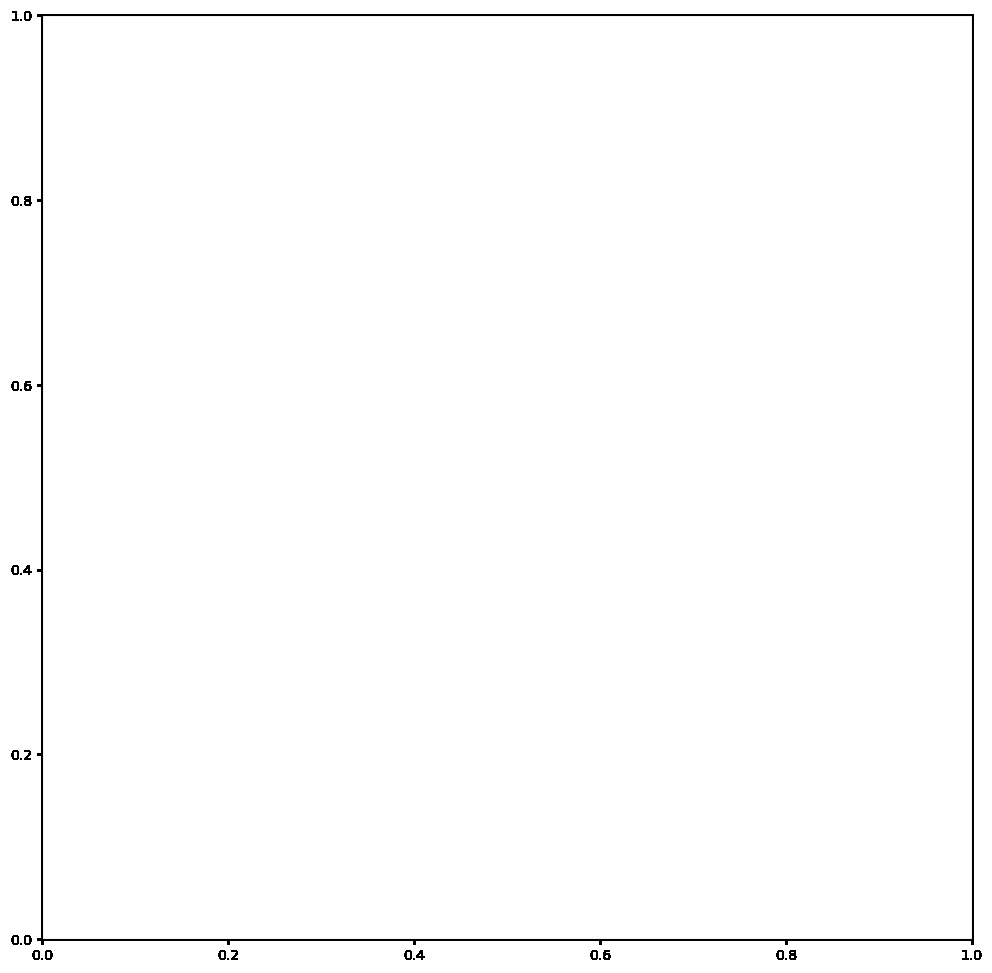

In [5]:
filenames = []

def PlotToImage(step, low_mass=True):
    for i in range(0, step):
        fig = plt.figure(step, figsize=(12,12))
        ax = fig.add_subplot()
        if low_mass:
            filename = 'Data1_5/Data0_01/Detailed/structure_' + str(i).zfill(5) + '.txt'
        else:
            filename = 'Data20/Data0_01/Detailed/structure_' + str(i).zfill(5) + '.txt'
        
        data = pd.read_fwf(filename, names=col_names_extended, index_col=0)
        fig, ax = plot_lumin(data)
        
        # lgd = ax.legend(loc="center right", bbox_to_anchor=(0.78, 0.25, 0.45, 0.45), title='Age/Axes')

        outFilename = "AnimationStep_%d.png" % (i)
        outFilepath = 'Images/'+ "AnimationStep_%d.png" % (i)
        filenames.append(outFilename)
        fig.savefig(outFilepath, dpi=80, pad_inches=0.2)
    
        plt.close()

PlotToImage(935)

In [7]:
def GIF_Maker(files):
    
    images = []

    for i in filenames:
        images.append(imageio.imread('Images/'+str(i)))

    imageio.mimsave('Animation.gif', images, format='GIF', fps=60)

GIF_Maker(filenames)

/var/folders/t7/12vt331d17518g8xjkn8hst80000gn/T/ipykernel_20901/4194675741.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread('Images/'+str(i)))
